<br>
<h1 style = "font-size:40px; font-family:monospace ; font-weight : bold; color : #3C0096; text-align: center; border-radius: 5px 25px;">SA-2021 Week 3 Graded Assignment</h1>
<br>

<br>
<h1 style = "font-size:30px; font-family:monospace ; font-weight : bold; color : #AE0052; text-align: center; border-radius: 10px 10px;">☔Rain Prediction in Australia☔</h1>
<br>

![](https://media0.giphy.com/media/tkMeNtj9FQYx2/giphy.gif)

<span style="font-size:20px;color:#0026D8;font-weight : bold">Dataset Description:</span>

**This dataset contains daily weather observations from numerous Australian weather stations.**
- **Date** - The date of observation<br>
- **Location** - The common name of the location of the weather station<br>
- **MinTemp** - The minimum temperature in degrees celsius<br>
- **MaxTemp** - The maximum temperature in degrees celsius<br>
- **Rainfall** - The amount of rainfall recorded for the day in mm<br>
- **Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
- **Sunshine** - The number of hours of bright sunshine in the day.<br>
- **WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight<br>
- **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
- **WindDir9am** - Direction of the wind at 9am<br>
- **WindDir3pm** - Direction of the wind at 3pm<br>
- **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
- **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
- **Humidity9am** - Humidity (percent) at 9am<br>
- **Humidity3pm** - Humidity (percent) at 3pm<br>
- **Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
- **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
- **Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of                    eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates                    completely clear sky whilst an 8 indicates that it is completely overcast.<br>
- **Cloud3pm** - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description                of the values<br>
- **Temp9am** - Temperature (degrees C) at 9am<br>
- **Temp3pm** - Temperature (degrees C) at 3pm<br>
- **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
- **RainTomorrow** - The target variable. Will it rain tomorrow?

### It is highly recommended to read the documentation before implementing any alogorithm.

- **Logistic Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
- **SVM** : https://scikit-learn.org/stable/modules/svm.html <br>
- **Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
- **Plot Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html <br>
- **ROC_AUC Score** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score <br>
- **Classification Report** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br>
- **Label Encoder** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
- **Label Binarizer** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html <br>
- **Standard Scaler** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br>
- **Cross Val Score** : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html <br>



In [1]:
## ======== Run this Cell as it is======== ##

from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">✅ Importing Required Libraries</h1>

In [2]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


## Import Confusion matrix, plot confusion matrix, classification report, 
## accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


## Import Label encoder, label binarizer and Standard Scaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler


## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Read the data </h1>

In [3]:
## ======== YOUR CODE HERE ======== ##
df = pd.read_csv('SA2021_W3_Data.csv')
df.head()
## ================================ ##

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [4]:
## Check the shape of data. It should be (24196,23)

## ======== YOUR CODE HERE ======== ##
df.shape

## ================================ ##

(24196, 23)

In [5]:
## Apply describe on dataframe

## ======== YOUR CODE HERE ======== ##

df.describe()
## ================================ ##

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24196 entries, 0 to 24195
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24196 non-null  int64  
 1   Location       24196 non-null  int64  
 2   MinTemp        24196 non-null  float64
 3   MaxTemp        24196 non-null  float64
 4   Rainfall       24196 non-null  float64
 5   Evaporation    24196 non-null  float64
 6   Sunshine       24196 non-null  float64
 7   WindGustDir    24196 non-null  int64  
 8   WindGustSpeed  24196 non-null  int64  
 9   WindDir9am     24196 non-null  int64  
 10  WindDir3pm     24196 non-null  int64  
 11  WindSpeed9am   24196 non-null  int64  
 12  WindSpeed3pm   24196 non-null  int64  
 13  Humidity9am    24196 non-null  int64  
 14  Humidity3pm    24196 non-null  int64  
 15  Pressure9am    24196 non-null  float64
 16  Pressure3pm    24196 non-null  float64
 17  Cloud9am       24196 non-null  int64  
 18  Cloud3

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Check missing values in the dataset and fill them by any method</h1>

In [7]:
## Check if there any null value in the dataset.

## ======== YOUR CODE HERE ======== ##

df.isna().sum()
## ================================ ##

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Use Feature Encoding :</h1>

In [8]:
## ======== YOUR CODE HERE ======== ##

## Use one hot encoding on dataframe
df_cat = df.select_dtypes(include='object').columns.values
print(df_cat)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

df_encoded = pd.get_dummies(df, columns=df_cat)


## ================================ ##


[]


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Split the data into train and test.</h1>

In [9]:
X = df.drop('RainTomorrow',axis=1)

In [10]:
y = df['RainTomorrow']

In [11]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,9,17,14,1012.8,1010.7,3,7,26.3,34.0,0
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,9,70,60,1022.3,1020.2,2,7,16.2,19.4,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,30,71,88,1008.4,1004.7,7,7,14.6,13.3,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,17,87,64,1018.4,1016.8,7,7,3.8,8.5,1
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,28,53,50,1014.2,1010.2,3,1,29.1,30.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24191,3231,16,20.8,24.4,0.0,7.6,7.9,1,48,4,...,28,56,56,1019.3,1016.6,5,2,23.0,23.8,0
24192,3405,16,10.7,20.1,0.6,1.2,6.4,13,22,13,...,15,89,69,1027.9,1024.4,2,6,11.9,18.7,0
24193,638,17,9.5,21.6,0.0,2.8,4.9,13,28,6,...,19,72,36,1019.2,1013.8,7,1,12.7,21.1,0
24194,987,11,5.5,9.0,0.8,0.8,0.6,8,43,7,...,24,91,83,1018.4,1017.9,8,8,7.1,7.8,0


In [12]:
y

0        1
1        0
2        1
3        0
4        0
        ..
24191    0
24192    0
24193    0
24194    1
24195    0
Name: RainTomorrow, Length: 24196, dtype: int64

In [13]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 25% of the full dataset and use random state = 2021

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)


## ================================ ##

In [14]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:", X_test.shape) # X_test
print("y_train:", y_train.shape) # y_train
print("y_test:", y_test.shape) # y_test

## ================================ ##

X_train: (18147, 22)
X_test: (6049, 22)
y_train: (18147,)
y_test: (6049,)


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scale the data using Standard Scaler :</h1>

In [15]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



## ================================ ##

In [16]:
X_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
13108,824,21,18.0,37.3,0.0,8.4,11.5,7,39,7,...,24,62,24,1016.2,1012.5,0,2,25.8,36.0,0
16081,568,6,3.5,11.4,2.8,2.0,0.1,13,31,13,...,13,74,60,1025.6,1023.3,7,7,7.2,11.1,1
16979,2919,16,22.3,29.3,0.0,8.0,6.9,12,31,13,...,20,75,62,1011.8,1007.7,7,3,24.1,27.4,0
12844,2650,10,17.3,22.5,3.4,2.0,2.3,3,54,3,...,22,81,70,1018.3,1014.0,7,6,20.0,20.8,1
8220,1548,2,14.4,24.1,3.4,2.8,7.2,0,46,9,...,11,85,47,1014.9,1013.8,7,2,15.1,22.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16477,2809,13,17.7,27.2,2.6,5.0,11.1,0,48,4,...,22,69,48,1014.9,1013.6,3,2,21.9,25.4,1
17587,3089,20,8.2,12.2,2.6,0.8,3.3,12,39,15,...,15,100,89,1026.1,1026.3,7,7,8.8,10.5,1
2335,1716,11,1.7,17.5,0.2,1.6,7.2,4,28,4,...,9,91,48,1027.9,1023.2,7,0,7.8,17.3,0
21437,1087,7,24.0,37.5,0.0,12.8,7.1,3,57,3,...,31,28,47,1006.1,1003.4,7,7,28.6,29.6,0


In [17]:
X_test_scaled

array([[-1.03873452,  1.5434542 ,  0.80115516, ...,  1.34733599,
         2.24270956, -0.6367392 ],
       [-1.34356246, -0.80405434, -1.60333285, ..., -1.67546922,
        -1.58245405,  1.57050172],
       [ 1.45585347,  0.76095135,  1.51421022, ...,  1.07105809,
         0.92156872, -0.6367392 ],
       ...,
       [ 0.02340032, -0.02155149, -1.90182102, ..., -1.57795937,
        -0.63000367, -0.6367392 ],
       [-0.72557145, -0.64755377,  1.79611571, ...,  1.80238194,
         1.25953498, -0.6367392 ],
       [ 0.01863738,  0.60445078, -1.9184037 , ..., -1.15541671,
        -0.46102054, -0.6367392 ]])

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train a Logistic Regression with all default parameters</h1>

In [18]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##

lr = LogisticRegression(random_state=2021)
lr.fit(X_train_scaled, y_train)

accuracy_score(y_test, lr.predict(X_test))

## ================================ ##

0.545544718135229

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix using plot_confusion_matrix module :</h1>

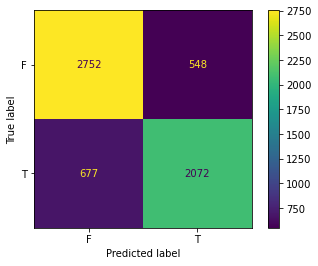

In [19]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

plot_confusion_matrix(lr, X_test_scaled, y_test, display_labels=['F', 'T'])



## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for LR :</h1>

In [20]:
## ======== YOUR CODE HERE ======== ##


y_pred_logreg = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_logreg))




## ================================ ##


              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3300
           1       0.79      0.75      0.77      2749

    accuracy                           0.80      6049
   macro avg       0.80      0.79      0.79      6049
weighted avg       0.80      0.80      0.80      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with Accuracy score for LR :</h1> 

In [21]:
## ======== YOUR CODE HERE ======== ##

print(f"Train data score: {lr.score(X_train_scaled, y_train)}")
print(f"Test data score: {lr.score(X_test_scaled, y_test)}")




## ================================ ##

Train data score: 0.7989199316691464
Test data score: 0.7974871879649529


In [22]:
## ======== YOUR CODE HERE ======== ##

## Print Accuracy Score for LR
print(f"Accuray: {accuracy_score(y_test, y_pred_logreg)}")

## ================================ ##

Accuray: 0.7974871879649529


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print ROC - AUC Score for LR :</h1> 

In [24]:
## ======== YOUR CODE HERE ======== ##

print(f"ROC-AUC score: {roc_auc_score(y_test, y_pred_logreg)}")


## ================================ ##

ROC-AUC score: 0.7938340112658047


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 50 and gamma = scale :</h1>

In [26]:
## ======== YOUR CODE HERE ======== ##

## Set probability = True 

sv = SVC(C=50, gamma= 'scale', probability=True, random_state= 2021, kernel='rbf')
sv.fit(X_train_scaled, y_train)

## ================================ ##

Wall time: 0 ns


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot Confusion Matrix for SVM :</h1>

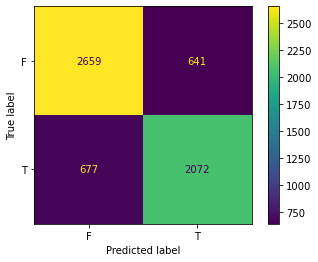

In [27]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.


plot_confusion_matrix(sv, X_test_scaled, y_test, display_labels=['F', 'T'])



## ================================ ##


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for SVM :</h1>

In [28]:
## ======== YOUR CODE HERE ======== ##

y_pred_svm = sv.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))


## ================================ ##

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3300
           1       0.76      0.75      0.76      2749

    accuracy                           0.78      6049
   macro avg       0.78      0.78      0.78      6049
weighted avg       0.78      0.78      0.78      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Accuracy score for SVM :</h1>

In [29]:
## ======== YOUR CODE HERE ======== ##

print(f"Accuracy: {accuracy_score(y_pred_svm, y_test)}")


## ================================ ##

Accuracy: 0.7821127459084146


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score for SVM :</h1> 

In [30]:
## ======== YOUR CODE HERE ======== ##

print(f"Train data score: {sv.score(X_train_scaled, y_train)}")
print(f"Test data score: {sv.score(X_test_scaled, y_test)}")


## ================================ ##

Train data score: 0.9291342921695046
Test data score: 0.7821127459084146


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for SVM :</h1> 

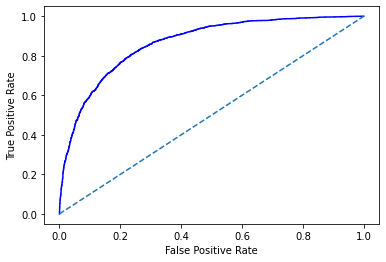

In [38]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph

y_pred_svm_prob = sv.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_prob[:, 1])

plt.plot(fpr, tpr, '-b')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


## ================================ ##

In [39]:
## ======== YOUR CODE HERE ======== ##

## Print out ROC score for SVM

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_svm)}")


## ================================ ##

ROC-AUC Score: 0.7797431021748955


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Train SVM with C = 1 and gamma = scale :</h1> 

In [40]:
## ======== YOUR CODE HERE ======== ##

## Train SVM with new mentioned parameters

sv = SVC(C=1, gamma= 'scale', probability=True, random_state= 2021)
sv.fit(X_train_scaled, y_train)
    
## ================================ ##

SVC(C=1, probability=True, random_state=2021)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print out Classification Report for new SVM :</h1>

In [41]:
## ======== YOUR CODE HERE ======== ##

y_pred_svm = sv.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svm))



## ================================ ##

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3300
           1       0.80      0.78      0.79      2749

    accuracy                           0.81      6049
   macro avg       0.81      0.81      0.81      6049
weighted avg       0.81      0.81      0.81      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Plot ROC curve and calculate ROC - AUC score for the new SVM :</h1> 

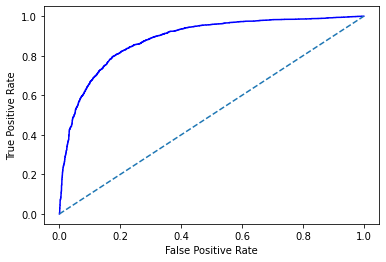

AUC-ROC Score: 0.8085358492488581


In [42]:
## ======== YOUR CODE HERE ======== ##

y_pred_svm_prob = sv.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_prob[:, 1])

plt.plot(fpr, tpr, '-b')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(f"AUC-ROC Score: {roc_auc_score(y_pred_svm, y_test)}")


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Print Training and Testing Score along with accuracy score for the new SVM :</h1> 

In [43]:
## ======== YOUR CODE HERE ======== ##
print(f"Train data score: {sv.score(X_train_scaled, y_train)}")
print(f"Test data score: {sv.score(X_test_scaled, y_test)}")




## ================================ ##

Train data score: 0.8343527855843941
Test data score: 0.8097206149776822


In [44]:
## ======== YOUR CODE HERE ======== ##

## Print out Accuracy score for the new SVM


print(f"Accuracy score: {accuracy_score(y_pred_svm, y_test)}")

## ================================ ##

Accuracy score: 0.8097206149776822


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Calculate Average Cross-Val score for the new SVM with 5 folds  :</h1> 

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Find mean for the calculated CV scores

scores = cross_val_score(sv, X_train_scaled, y_train, cv = 5)
print(f"Cross Validation Score: {scores}")
print(f"Avg CVS: {scores.mean()}")


## ================================ ##